# Gradient descent principles
#### Flàvia Ferrús and David Rosado

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### **1.Gradient descent methods**

### 1.1. A simple quadratic function

We begin with a simple two-dimensional function, namely $f(x_1,x_2)=x_1^2+x_2^2$. Let us plot the function to get familiarize with it.

In [6]:
def f(x,y):
    return x**2 + y**2

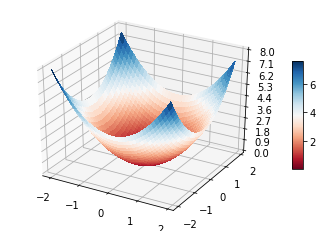

In [7]:
#Plot of the function
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from matplotlib import cm
import pylab

x=np.arange(-2,2, 0.1)
y=np.arange(-2,2, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= f(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

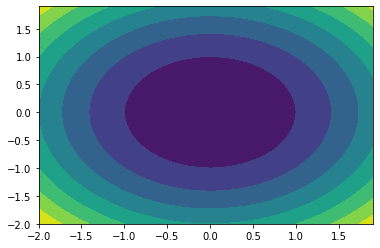

In [ ]:
#Contour plot
fig, ax = plt.subplots()
ax.contourf(X, Y, Z)

plt.show()

We begin some experiments with gradient descent using a constant step
\begin{align*}
\textbf{x}^{k+1}=\textbf{x}^k-\alpha^k\nabla f(\textbf{x}^k)
\end{align*}

#### 1.Implement the previous algorithm with a constant $\alpha^k=0.1$ parameter.

In [ ]:
#We compute the gradient of the function
def grad_f(x,y):
  return np.array([2*x, 2*y])

In [ ]:
# Compute the gradient descent method for a given initial point and number of steps
def gradDescent( x0, steps, alpha = 0.1):
    x_path=np.zeros(steps)
    y_path=np.zeros(steps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    for i in range(1,steps):
        x_k = x_0-alpha*grad_f(x_0[0],x_0[1])
        x_0 = x_k
        x_path[i]=x_k[0]
        y_path[i]=x_k[1]
    return x_path, y_path

In [ ]:
#Function that plots the path of gradient descent for a given initial point and number of steps
def plotGrad(x0, steps, alpha=0.1):
    if x0[0] == 0:
        x=np.arange(-1,1, 0.1)
        y=np.arange(-abs(x0[1]),abs(x0[1]), 0.1)
    elif x0[1] == 0:
        x=np.arange(-abs(x0[0]),abs(x0[0]), 0.1)
        y=np.arange(-1,1, 0.1)
    else: 
        x=np.arange(-abs(x0[0]),abs(x0[0]), 0.1)
        y=np.arange(-abs(x0[1]),abs(x0[1]), 0.1)
    X, Y = pylab.meshgrid(x,y)
    Z= f(X,Y)
    x_path, y_path = gradDescent(x0, steps, alpha)
    plt.contourf(X, Y, Z, alpha= .7)
    plt.plot(x_path, y_path, 'r')
    print(x_path[-1], y_path[-1])
    #print(len(x_path))

In a moment, we will see that the algorithm is always converging to the global minimum of the function, $(0,0)$. Let us draw the path
the gradient descent follows for each of the starting points $x_0$ we have studied.

2.5462949704181097e-10 5.092589940836219e-10


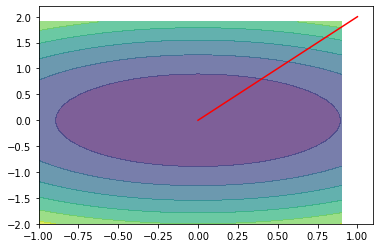

In [ ]:
x_0 = [1,2]
plotGrad(x_0, 100)

We can now contrast different number of iterations and different starting points when considering the regular gradient descent method with constant step. 

Note that, evidently, the output is closer to the minimum when more iterations are considered, and when the initial point is already closer to the extreme point we are seeking for, as would be expected by intuition. 

0.13421772800000004 0.26843545600000007


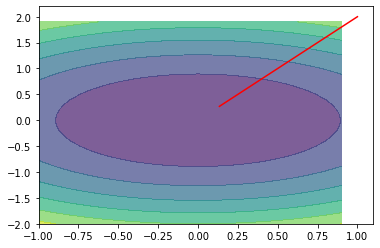

In [ ]:
plotGrad([1,2], 10)

0.13421772800000004 0.13421772800000004


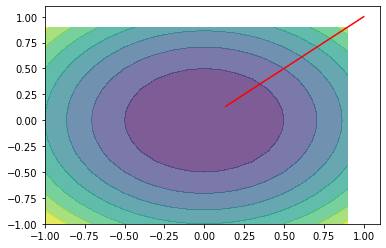

In [ ]:
plotGrad([1,1], 10)

2.5462949704181097e-10 2.5462949704181097e-10


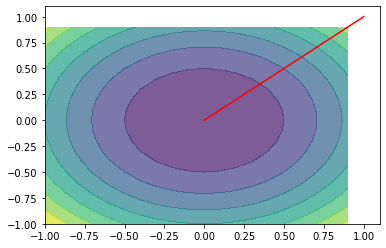

In [ ]:
plotGrad([1,1], 100)

1.2731474852090548e-09 7.638884911254329e-10


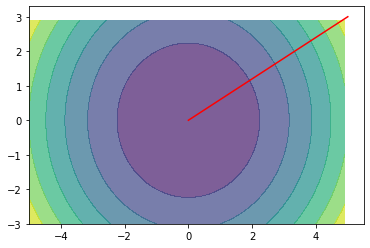

In [ ]:
plotGrad([5,3], 100)

#### 2.Try other values of $\alpha$ such as $\alpha^k=1$ or $\alpha^k=2$.

-1.0 -2.0


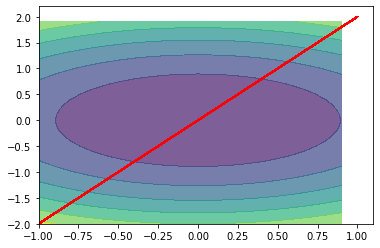

In [ ]:
plotGrad([1,2], 100, alpha = 1)

9.948742818458484e+17 1.989748563691697e+18


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


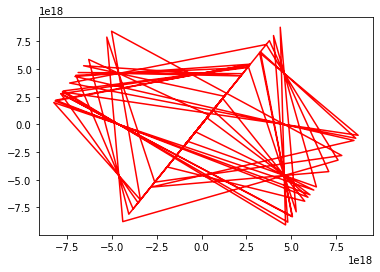

In [ ]:
plotGrad([1,2], 100, alpha = 2)

In this case the gradient descent performs poorly due to the too bigger steps. Actually, it does not works.

### 1.2 A function with a multiple minima

Consider now the following function:
$$ 
f(x_1, x_2) = x_1^2f(\mathbf{x}) = x_1^2(4-2.1x_1^2 + \frac{1}{3}x_1^4) + x_1 x_2 + x_2^2(-4 + 4x_2^2).
$$
Let's first consider the corresponding 3D plot and contour plot:

In [ ]:
def f12(x,y):
    return x**2*(4-2.1*x**2 + (1/3)*x**4) + x*y + y**2*(-4+4*y**2)

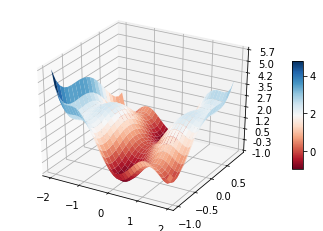

In [ ]:
x=np.arange(-2,2, 0.1)
y=np.arange(-1,1, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= f12(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

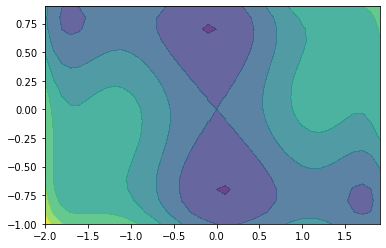

In [ ]:
fig, ax = plt.subplots()
ax.contourf(X, Y, Z, alpha= .8)

plt.show()

Note that this function has several local minimums, and therefore the descend algorithm may converge on different minimums depending on the initial value taken.

#### 1. Let's follow the gradient descent with 100 iterations at different starting points.

In [ ]:
def grad12(x,y):
    return np.array([2*x*(4-2.1*x**2 + (1/3)*x**4) + x**2*(-2*2.1*x + (4/3)*x**3)+y,
                     x+2*y*(-4+4*y**2) + 8*y**3])
#Function that computes gradient descent for the above function for a given initial point and number of steps
def gradDescent12( x0, steps, alpha = 0.1):
    x_path=np.zeros(steps)
    y_path=np.zeros(steps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    for i in range(1,steps):
        x_k = x_0-alpha*grad12(x_0[0],x_0[1])
        x_0 = x_k
        x_path[i]=x_k[0]
        y_path[i]=x_k[1]
    return x_path, y_path
#Function that plots the path of gradient descent for the above function for a given initial point and number of steps
def plotGrad12(x0, steps, alpha=0.1):
    if x0[0] == 0:
        x=np.arange(-1,1, 0.1)
        y=np.arange(-abs(x0[1]),abs(x0[1]), 0.1)
    elif x0[1] == 0:
        x=np.arange(-abs(x0[0]),abs(x0[0]), 0.1)
        y=np.arange(-1,1, 0.1)
    else: 
        x=np.arange(-abs(x0[0]),abs(x0[0]), 0.1)
        y=np.arange(-abs(x0[1]),abs(x0[1]), 0.1)
    X, Y = pylab.meshgrid(x,y)
    Z= f12(X,Y)
    x_path, y_path = gradDescent12(x0, steps, alpha)
    plt.contourf(X, Y, Z, alpha= .7)
    plt.plot(x_path, y_path, 'r')

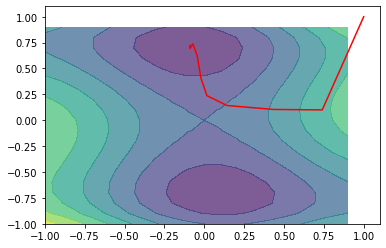

In [ ]:
plotGrad12([1,1], 100)

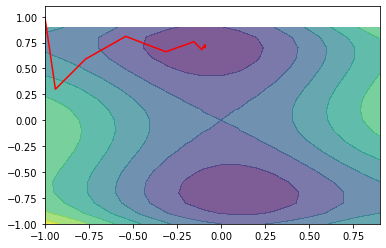

In [ ]:
plotGrad12([-1,1], 100)

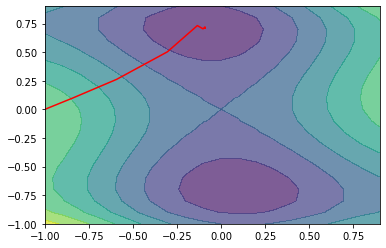

In [ ]:
plotGrad12([-1,0], 100)

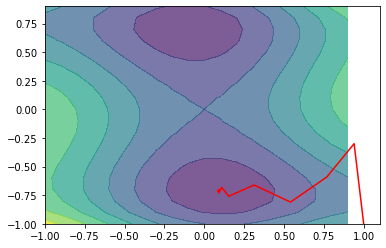

In [ ]:
plotGrad12([1,-1], 100)

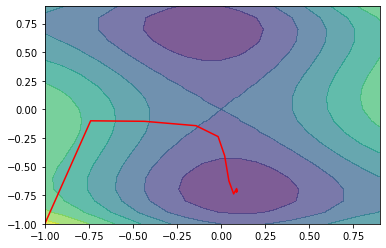

In [ ]:
plotGrad12([-1,-1], 100)

Note that the algorithm usually converges to the minimum located in the valley to which x0 belongs.

#### 2. Gradient descent with adaptable step size.

Let's consider the double loop procedure to perform the gradient descent adapting the value of the step size:

In [ ]:
def doubleloop(x0, thres, maxSteps=100):
    x_path=np.zeros(maxSteps)
    y_path=np.zeros(maxSteps)
    x_path[0]=x0[0]
    y_path[0]=x0[1]
    x_0 = x0
    alpha=1
    for i in range(1,100):
      x_k=x_0-alpha*grad12(x_0[0],x_0[1])
      while f12(x_k[0],x_k[1])>f12(x_0[0],x_0[1]):
        alpha=alpha/2
        x_k=x_0-alpha*grad12(x_0[0],x_0[1])
      if f12(x_k[0],x_k[1])<f12(x_0[0],x_0[1]):
        if abs(f12(x_k[0], x_k[1]) - f12(x_0[0], x_0[1])) < thres:
          return x_path[0:i], y_path[0:i], i
        else:
            x_0 = x_k
      x_path[i]=x_k[0]
      y_path[i]=x_k[1]
    print('The method has not converged after' +str(maxSteps)+ ' iterations.\n')
    print('The last values reached are', x_path, y_path)
        
    return x_path, y_path,i

In [ ]:
def plotDoubleLoop12(x0, thres, maxSteps=100):
    if x0[0] == 0:
        x=np.arange(-1,1, 0.1)
        y=np.arange(-abs(x0[1]),abs(x0[1]), 0.1)
    elif x0[1] == 0:
        x=np.arange(-abs(x0[0]),abs(x0[0]), 0.1)
        y=np.arange(-1,1, 0.1)
    else: 
        x=np.arange(-abs(x0[0]),abs(x0[0]), 0.1)
        y=np.arange(-abs(x0[1]),abs(x0[1]), 0.1)
    X, Y = pylab.meshgrid(x,y)
    Z= f12(X,Y)
    x_path, y_path,iter = doubleloop(x0, thres, maxSteps)
    plt.contourf(X, Y, Z, alpha= .7)
    plt.plot(x_path, y_path, 'r')
    print(x_path[-1],y_path[-1])
    print('The method has converged after '+str(iter)+ ' iterations.\n')

The method has converged after 7 iterations.



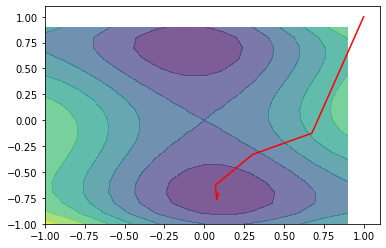

In [ ]:
plotDoubleLoop12([1,1], thres= 1e-5)

The method has converged after 15 iterations.



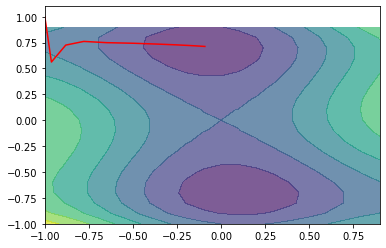

In [ ]:
plotDoubleLoop12([-1,1], thres= 1e-5)

The method has converged after 11 iterations.



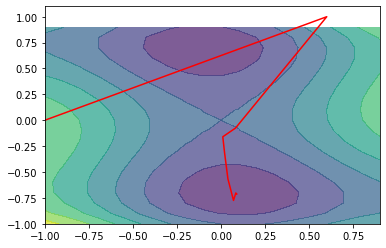

In [ ]:
plotDoubleLoop12([-1,0], thres= 1e-5)

The method has converged after 15 iterations.



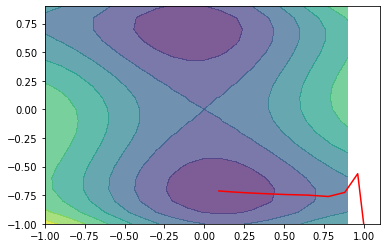

In [ ]:
plotDoubleLoop12([1,-1], thres= 1e-5)

The method has converged after 7 iterations.



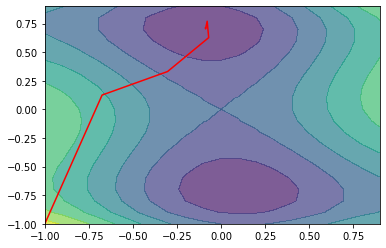

In [ ]:
plotDoubleLoop12([-1,-1], thres= 1e-5)

The method is really fas, we do not need even 20 iterations to convergence in most of the cases. The algorithm is superior compared to those presented before.

### 1.3 The Rosenbrock function

The Rosenbrock function is $f(x_1,x_2)=(a-x_1)^2+b(x_2-x_1^2)^2$. It turns out that the function has a global minimum at $(x_1^*,x_2^*)=(a,a^2)$, where $f(x_1^*,x_2^*)=(0,0)$. The global minimum
is inside a long, very narrow, parabolic shaped valley.

#### 1. Plot the contours of the Rosenbrock function for $a = 1$ and $b = 100$.

In [10]:
def fR(x,y,a,b):
  return (a-x)**2 + b*(y-x**2)**2

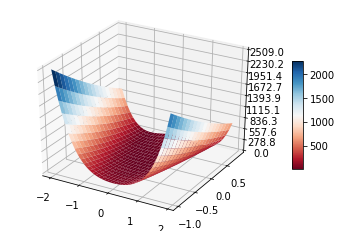

In [11]:
x=np.arange(-2,2, 0.1)
y=np.arange(-1,1, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= fR(X,Y,1,100)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

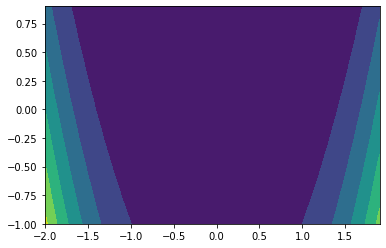

In [12]:
#Contour plot
fig, ax = plt.subplots()
ax.contourf(X, Y, Z)

plt.show()

Let us also draw the gradient information.

In [13]:
def grad_fR(x,y,a,b):
  return np.array([-2*(a-x)-2*b*(y-x**2)*2*x,2*(y-x**2)])